# Regression MLP

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/Papul-Ghosh/ML-Housing-Price/blob/main/Regression_MLP.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [5]:
import sys

import sklearn

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np
import pandas as pd
import os
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Let's load, split and scale the California housing dataset

In [6]:
from tensorflow import keras

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.4656

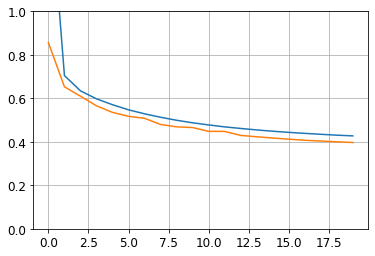

In [10]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [14]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [15]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4107 - val_l

In [16]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 994us/step - loss: 0.3409


In [17]:
y_pred = keras_reg.predict(X_new)

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 4.6276 - val_loss: 1.8752
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.5234 - val_loss: 0.9522
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9184 - val_loss: 0.7820
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7683 - val_loss: 0.7249
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6916 - val_loss: 0.6994
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6558 - val_loss: 0.9118
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6644 - val_loss: 0.8495
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6308 - val_loss: 0.8605
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 0.6524
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6155 - val_loss: 0.8619
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


242/242 [==============================] - 1s 3ms/step - loss: 4.6915 - val_loss: 23.0855
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6966 - val_loss: 10.8387
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0801 - val_loss: 4.4392
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8957 - val_loss: 1.5338
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8083 - val_loss: 0.7192
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7513 - val_loss: 1.2046
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7264 - val_loss: 2.4524
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6758 - val_loss: 4.1421
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6653 - val_loss: 5.9820
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6333 - val_loss: 7.7654

242/242 [==============================] - 0s 2ms/step - loss: 1.3101 - val_loss: 282.6048
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6634 - val_loss: 656.3251
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 20.9502 - val_loss: 1380.0117
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 8.9660 - val_loss: 2817.4534
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7009 - val_loss: 4499.3799
Epoch 11/100
121/121 [==============================] - 0s 771us/step - loss: 11.0521
[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   5.0s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.4030 - val_loss: 2.6033
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1446 - val_loss: 1.0424
Epoch 3/100
242/242 [==============================

242/242 [==============================] - 0s 1ms/step - loss: 0.4779 - val_loss: 0.5264
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4594 - val_loss: 0.4894
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4711
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4446 - val_loss: 0.4525
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4432 - val_loss: 0.4467
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4445 - val_loss: 0.4404
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4271 - val_loss: 0.4333
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4087 - val_loss: 0.4302
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4180 - val_loss: 0.4284
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 

242/242 [==============================] - 1s 2ms/step - loss: 4.6799 - val_loss: 28.0492
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.2876 - val_loss: 43.0472
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7123 - val_loss: 37.0128
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4436 - val_loss: 28.7538
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1760 - val_loss: 20.6120
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0429 - val_loss: 14.6245
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9553 - val_loss: 10.5960
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8539 - val_loss: 7.2861
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8283 - val_loss: 5.1836
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7813 - val_loss: 3

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.7475 - val_loss: 13.7380
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6583 - val_loss: 10.0594
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5972 - val_loss: 41.2693
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4270 - val_loss: 74.9048
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5524 - val_loss: 205.5686
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5429 - val_loss: 246.7374
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.7293 - val_loss: 388.8352
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 10.7464 - val_loss: 620.5344
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 4.7920 - val_loss: 919.7242
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3203 - val_loss: 0.3789
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3060 - val_loss: 0.4178
Epoch 100/100
121/121 [==============================] - 0s 708us/step - loss: 0.3168
[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  30.6s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 4.6508 - val_loss: 7.0502
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 2.5504 - val_loss: 7.2037
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6914 - val_loss: 5.5884
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3626 - val_loss: 3.7640
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1498 - val_loss: 2.5552
Epoch 6/100
242/242 [==============================] - 0s 1ms/ste

242/242 [==============================] - 0s 1ms/step - loss: 0.5327 - val_loss: 0.5049
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5406 - val_loss: 0.4989
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5348 - val_loss: 0.4930
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5169 - val_loss: 0.4880
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5190 - val_loss: 0.4819
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4954 - val_loss: 0.4768
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5252 - val_loss: 0.4726
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5053 - val_loss: 0.4680
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4751 - val_loss: 0.4647
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4812 - val_loss: 

Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3659 - val_loss: 0.3798
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.3800
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3804 - val_loss: 0.3783
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3626 - val_loss: 0.3797
Epoch 51/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 0.3820
Epoch 52/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3767 - val_loss: 0.3765
Epoch 53/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.3772
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3674 - val_loss: 0.3766
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3558 - val_loss: 0.3773
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3912

Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9825 - val_loss: 0.9896
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9155 - val_loss: 0.9739
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8496 - val_loss: 0.9570
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7428 - val_loss: 0.9426
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7397 - val_loss: 0.9414
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7434 - val_loss: 0.9351
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7074 - val_loss: 0.9457
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6917 - val_loss: 0.9437
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6979 - val_loss: 0.9404
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6856

242/242 [==============================] - 0s 1ms/step - loss: 0.3575 - val_loss: 0.3408
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3744 - val_loss: 0.3928
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3562 - val_loss: 0.3411
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3505 - val_loss: 0.4823
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3463 - val_loss: 0.3589
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.3810
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3626 - val_loss: 0.4593
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3593 - val_loss: 0.3360
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3502 - val_loss: 0.4983
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3481 - val_loss: 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.0min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001934C963400>, as the constructor either does not set or modifies parameter learning_rate

In [20]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [21]:
rnd_search_cv.best_score_

-0.34988949696222943

In [22]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 810us/step - loss: 0.4212


0.42117786407470703